In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
def dataParser(filePath, store_feature_75 = False):
    # Read the data
    f = open(filePath, 'r')
    lines = f.readlines()
    f.close()
    # Parse the data
    data = []
    idx = 0
    for line in lines:
        tokens = line.split()
        id = tokens[1]
        if id == 'qid:4':
            relevance = int(tokens[0])
            full_row = line
            if store_feature_75:
                feature_75 = float(tokens[76].split(':')[1])
                data.append({
                    'idx': idx,
                    'relevance': relevance,
                    'feature_75': feature_75,
                    'full_row': full_row
                })
            else:
                data.append({
                    'idx': idx,
                    'relevance': relevance,
                    'full_row': full_row
                })
        idx += 1
    return data

In [3]:
def compute_DCG(data, rank):
    # Compute the DCG
    DCG = data[0]['relevance']
    if rank == None:
        rank = len(data)
    for i in range(1, rank):
        DCG += data[i]['relevance'] / np.log2(i + 1)
    return DCG

In [4]:
def compute_IDCG(data, rank):
    # Sort the data by relevance
    data = sorted(data, key=lambda x: x['relevance'], reverse=True)
    # Compute the IDCG
    IDCG = data[0]['relevance']
    if rank == None:
        rank = len(data)
    for i in range(1, rank):
        IDCG += data[i]['relevance'] / np.log2(i + 1)
    return IDCG

In [5]:
def compute_NDCG(data, rank):
    # Compute the DCG and IDCG
    DCG = compute_DCG(data, rank)
    IDCG = compute_IDCG(data, rank)
    # Compute the NDCG
    NDCG = DCG / IDCG
    return NDCG

In [6]:
data = dataParser('Data/IR-assignment-2-data (2).txt', store_feature_75 = False)
sorted_data = sorted(data, key=lambda x: x['relevance'], reverse=True)

In [7]:
documents_per_relevance_score = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
}

In [8]:
sample_sorted_data = []
for i in sorted_data:
    documents_per_relevance_score[i['relevance']] += 1
    sample_sorted_data.append(i['full_row'])
# Write the data to a file
with open('Sorted_By_DCG.txt', 'w') as f:
    for item in sample_sorted_data:
        f.write(item + "\n")

In [9]:
count_of_different_possible_files = 1
for i in documents_per_relevance_score:
    count_of_different_possible_files *= math.factorial(documents_per_relevance_score[i])
print("Number of different possible files: ", count_of_different_possible_files)

Number of different possible files:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [10]:
nDCG_at_50 = compute_NDCG(data, 50)
nDCG_entire = compute_NDCG(data, None)
print("nDCG@50: ", nDCG_at_50)
print("nDCG@entire: ", nDCG_entire)

nDCG@50:  0.3521042740324887
nDCG@entire:  0.5979226516897831


In [11]:
data_with_feature_75 = dataParser('Data/IR-assignment-2-data (2).txt', store_feature_75 = True)
sorted_data_wrt_feature_75 = sorted(data_with_feature_75, key=lambda x: x['feature_75'], reverse=True)

#### Relevance Threshold = 0 

In [17]:
precision_at_k = []
recall_at_k = []
relevant_at_k = 0
total_relevant = 0
for i in sorted_data_wrt_feature_75:
    if i['relevance'] > 0:
        total_relevant += 1
for i in range(len(data_with_feature_75)):
    if sorted_data_wrt_feature_75[i]['relevance'] > 0:
        relevant_at_k += 1
    precision_at_k.append(relevant_at_k / (i + 1))
    recall_at_k.append(relevant_at_k / total_relevant)

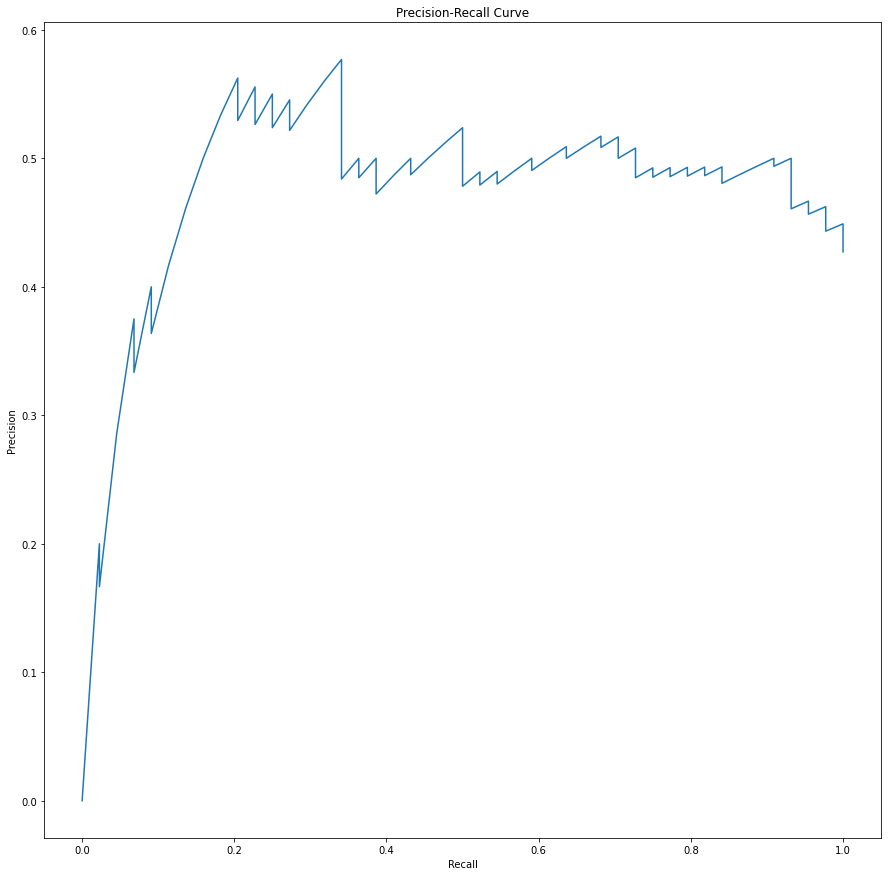

In [18]:
# Plot the precision-recall curve
plt.plot(recall_at_k, precision_at_k)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

#### Relevance Threshold = 1

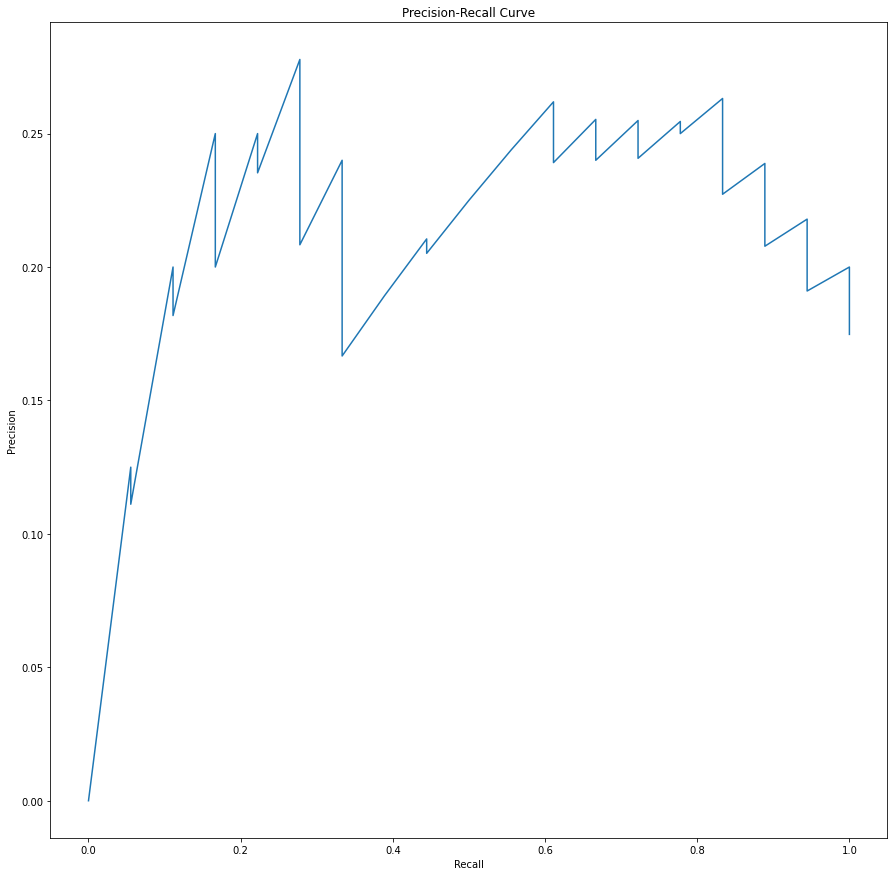

In [14]:
precision_at_k = []
recall_at_k = []
relevant_at_k = 0
total_relevant = 0
for i in sorted_data_wrt_feature_75:
    if i['relevance'] > 1:
        total_relevant += 1
for i in range(len(data_with_feature_75)):
    if sorted_data_wrt_feature_75[i]['relevance'] > 1:
        relevant_at_k += 1
    precision_at_k.append(relevant_at_k / (i + 1))
    recall_at_k.append(relevant_at_k / total_relevant)

# Plot the precision-recall curve
plt.plot(recall_at_k, precision_at_k)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

#### Relevance Threshold = 2

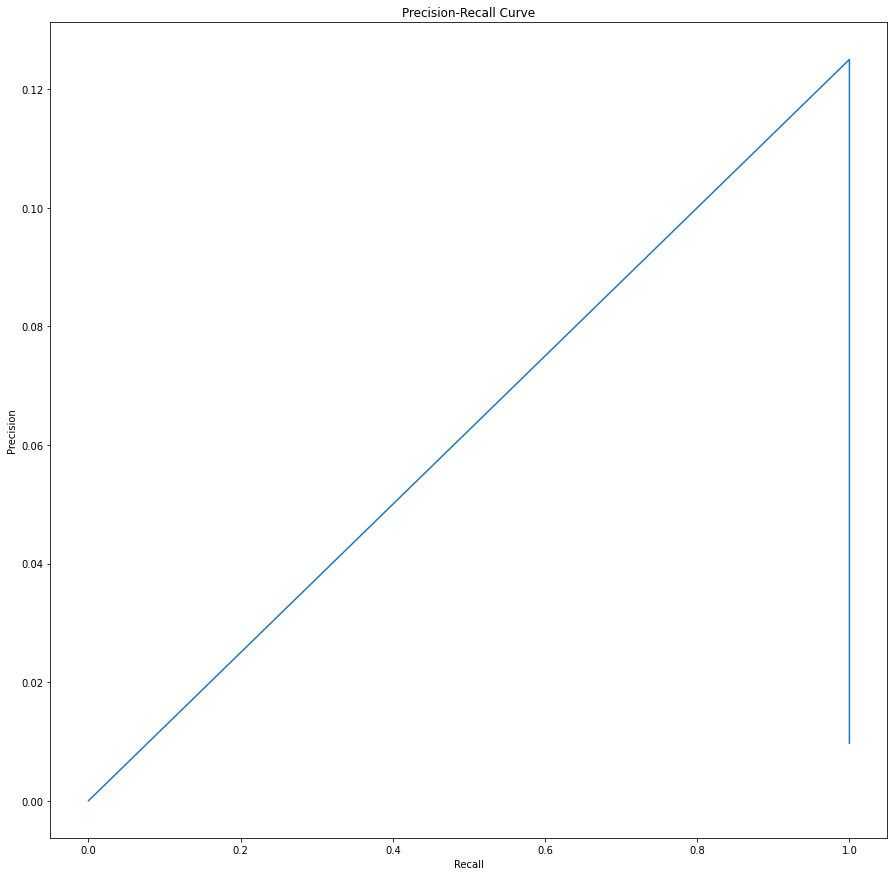

In [15]:
precision_at_k = []
recall_at_k = []
relevant_at_k = 0
total_relevant = 0
for i in sorted_data_wrt_feature_75:
    if i['relevance'] > 2:
        total_relevant += 1
for i in range(len(data_with_feature_75)):
    if sorted_data_wrt_feature_75[i]['relevance'] > 2:
        relevant_at_k += 1
    precision_at_k.append(relevant_at_k / (i + 1))
    recall_at_k.append(relevant_at_k / total_relevant)

# Plot the precision-recall curve
plt.plot(recall_at_k, precision_at_k)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.rcParams["figure.figsize"] = (15,15)
plt.show()